# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

In [19]:
model = Sequential()

In [20]:
#建構輸入層
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [21]:
#建構輸入層-2
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [22]:
#建構輸入層-3
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [23]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 163us/step - loss: 0.2397 - acc: 0.9264 - val_loss: 0.1451 - val_acc: 0.9530
Epoch 2/10
48000/48000 [==============================] - 8s 158us/step - loss: 0.1015 - acc: 0.9686 - val_loss: 0.1194 - val_acc: 0.9644
Epoch 3/10
48000/48000 [==============================] - 7s 156us/step - loss: 0.0704 - acc: 0.9792 - val_loss: 0.0970 - val_acc: 0.9739
Epoch 4/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.0527 - acc: 0.9832 - val_loss: 0.1119 - val_acc: 0.9683
Epoch 5/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.0429 - acc: 0.9868 - val_loss: 0.1280 - val_acc: 0.9657
Epoch 6/10
48000/48000 [==============================] - 8s 158us/step - loss: 0.0378 - acc: 0.9876 - val_loss: 0.1117 - val_acc: 0.9720
Epoch 7/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.0320 - acc: 0.9898 - val_loss: 0.1123 - 

# 以圖形顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

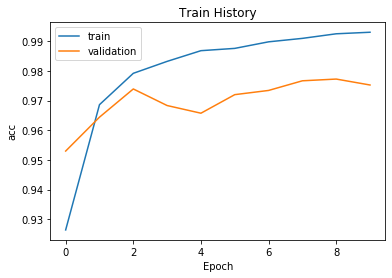

In [27]:
show_train_history(train_history,'acc','val_acc')

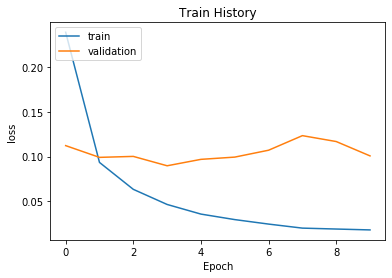

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 33us/step

accuracy= 0.9784
